# <font color=lightblue>TV Dramas</font>

This data is from IMDB, and contains all television dramas from 1990 to 2018. Data credit goes to [Sara Stoudt](https://twitter.com/sastoudt).

---
|**Variable**  |**Description**                |
|:---------|:--------------------------|
|titleId   |Unique identifier for series|
|seasonNumber|Season number for series|
|title|Title of series|
|date|Series premiere date|
|av_rating|Average IMDB user rating (1-10 scale)|
|share|Share of total views among all dramas in the same year|
|genres|List of applicable genres to the series|

---
## <font color=green>Data Collection</font>

* Import packages
* Read in data
* Observe shape, head, and tail
---

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 60)
plt.style.use('ggplot')

In [54]:
data = pd.read_csv('IMDb_Economist_tv_ratings.csv')

In [55]:
data.shape

(2266, 7)

In [56]:
data.head()

,titleId,seasonNumber,title,date,av_rating,share,genres
0,tt2879552,1,11.22.63,2016-03-10,8.4890,0.51,"Drama,Mystery,Sci-Fi"
1,tt3148266,1,12 Monkeys,2015-02-27,8.3407,0.46,"Adventure,Drama,Mystery"
2,tt3148266,2,12 Monkeys,2016-05-30,8.8196,0.25,"Adventure,Drama,Mystery"
3,tt3148266,3,12 Monkeys,2017-05-19,9.0369,0.19,"Adventure,Drama,Mystery"
4,tt3148266,4,12 Monkeys,2018-06-26,9.1363,0.38,"Adventure,Drama,Mystery"


In [57]:
data.tail()

,titleId,seasonNumber,title,date,av_rating,share,genres
2261,tt3250026,3,Zoo,2017-07-31,7.4132,0.09,"Drama,Mystery,Sci-Fi"
2262,tt3501584,1,iZombie,2015-04-28,8.4296,0.59,"Comedy,Crime,Drama"
2263,tt3501584,2,iZombie,2016-01-07,8.5641,0.43,"Comedy,Crime,Drama"
2264,tt3501584,3,iZombie,2017-05-16,8.4077,0.23,"Comedy,Crime,Drama"
2265,tt3501584,4,iZombie,2018-04-13,8.1214,0.32,"Comedy,Crime,Drama"


---
## <font color='red'>Findings and Results</font>

* 2266 observations in the data
* 7 columns
* `genres` needs to be expanded into multiple columns

---

---
## <font color=green>Data Cleaning</font>

* Observe data types
* Expand `genres` into several binary columns of genre identifiers, remove `genres` column
* Explicitly cast `date` as a DateTime type
* Create `year` and `month` columns from the `date` column
---

In [58]:
#see dtypes of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titleId       2266 non-null   object 
 1   seasonNumber  2266 non-null   int64  
 2   title         2266 non-null   object 
 3   date          2266 non-null   object 
 4   av_rating     2266 non-null   float64
 5   share         2266 non-null   float64
 6   genres        2266 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 124.0+ KB


In [59]:
#expand genres column

data['genres'] = data['genres'].str.split(',')
data_exploded = data.explode('genres')

genre_dummies = pd.get_dummies(data_exploded['genres'], prefix='genre')
genre_dummies = genre_dummies.groupby(level=0).sum()
data = pd.concat([data, genre_dummies], axis=1)
data = data.drop('genres', axis=1)
data = data.drop('genre_Drama', axis=1)

In [60]:
#set data column as datetime

data['date'] = pd.to_datetime(data['date'])

In [61]:
#create year and month columns

data['year'] = data['date'].dt.year.astype('int64')
data['month'] = data['date'].dt.month.astype('int64')

In [62]:
#new column count

len(data.columns)

29

---
## <font color='red'>Findings and Results</font>

* `genres` column is removed
* 20 additional columns of genre identifiers added

---

---
## <font color='green'>Data Exploration</font>

* Examine aggregate statistics of cleaned data
* Find distribution of numeric columns with histograms
* Scale data and create a correlation graph of all numeric columns
* Find highest `seasonNumber`/`title` combinations with highest `share` values
* Evaluate `share` column: documentation not clear. Does it mean share of total views, or exclusively drama views?
---

In [63]:
#descriptive stats for non-numeric columns

data.describe(exclude=['int64', 'float64', 'datetime', 'uint8'])

,titleId,title
count,2266,2266
unique,876,868
top,tt0203259,Law & Order: Special Victims Unit
freq,20,20


In [64]:
#descriptive stats for numeric columns

data.describe(exclude=['object', 'datetime'])

,seasonNumber,av_rating,share,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western,year,month
count,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000
mean,3.264342,8.060557,1.279982,0.170786,0.090026,0.015887,0.012798,0.227714,0.362754,0.001765,0.033539,0.098411,0.027361,0.054722,0.014122,0.002648,0.246249,0.000883,0.103707,0.067961,0.012798,0.070609,0.004413,0.003972,2010.438658,5.459400
std,3.438046,0.671286,3.384226,0.376405,0.286283,0.125066,0.112426,0.419450,0.480901,0.041987,0.180080,0.297936,0.163169,0.227487,0.118019,0.051400,0.430920,0.029702,0.304947,0.251735,0.112426,0.256227,0.066299,0.062910,6.806112,3.850677
min,1.000000,2.703900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1990.000000,1.000000
25%,1.000000,7.731300,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,2.000000
50%,2.000000,8.114850,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,5.000000
75%,4.000000,8.489850,1.090000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,9.000000
max,44.000000,9.682400,55.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,12.000000


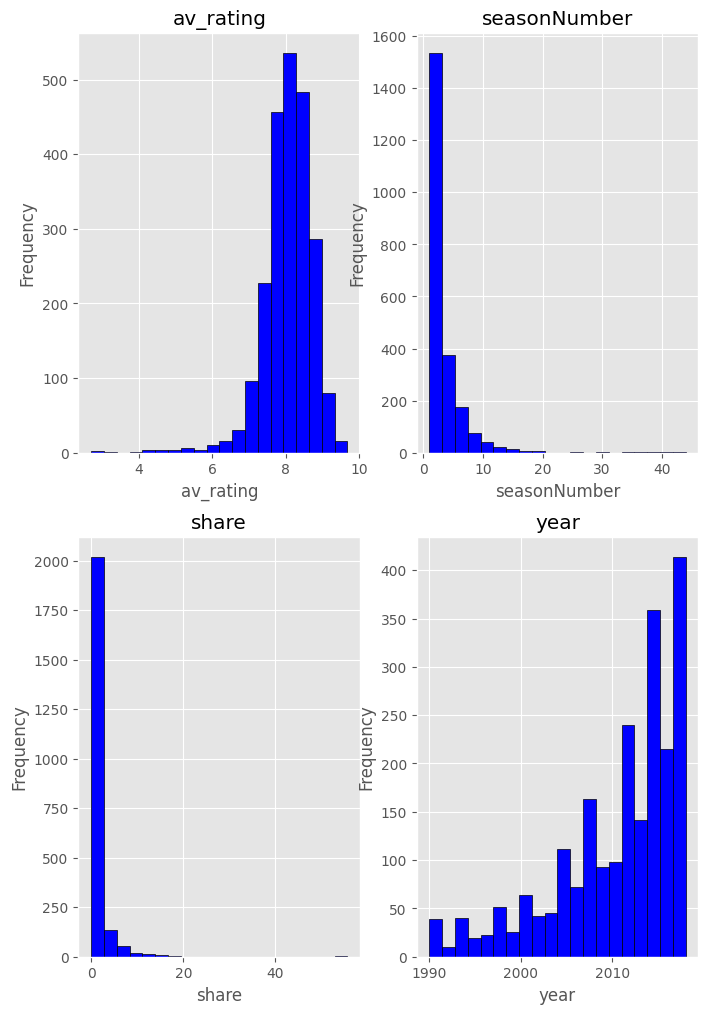

In [65]:
#histograms of numeric data

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 12))

cols = ['av_rating', 'share', 'seasonNumber', 'year']

for i in range(len(cols)):
    axes[i%2][i//2].hist(data[cols[i]], bins=20, color='blue', edgecolor='black')
    axes[i%2][i//2].set_xlabel(cols[i])
    axes[i%2][i//2].set_ylabel('Frequency')
    axes[i%2][i//2].set_title(cols[i])

Text(0.5, 1.0, 'Correlation Values')

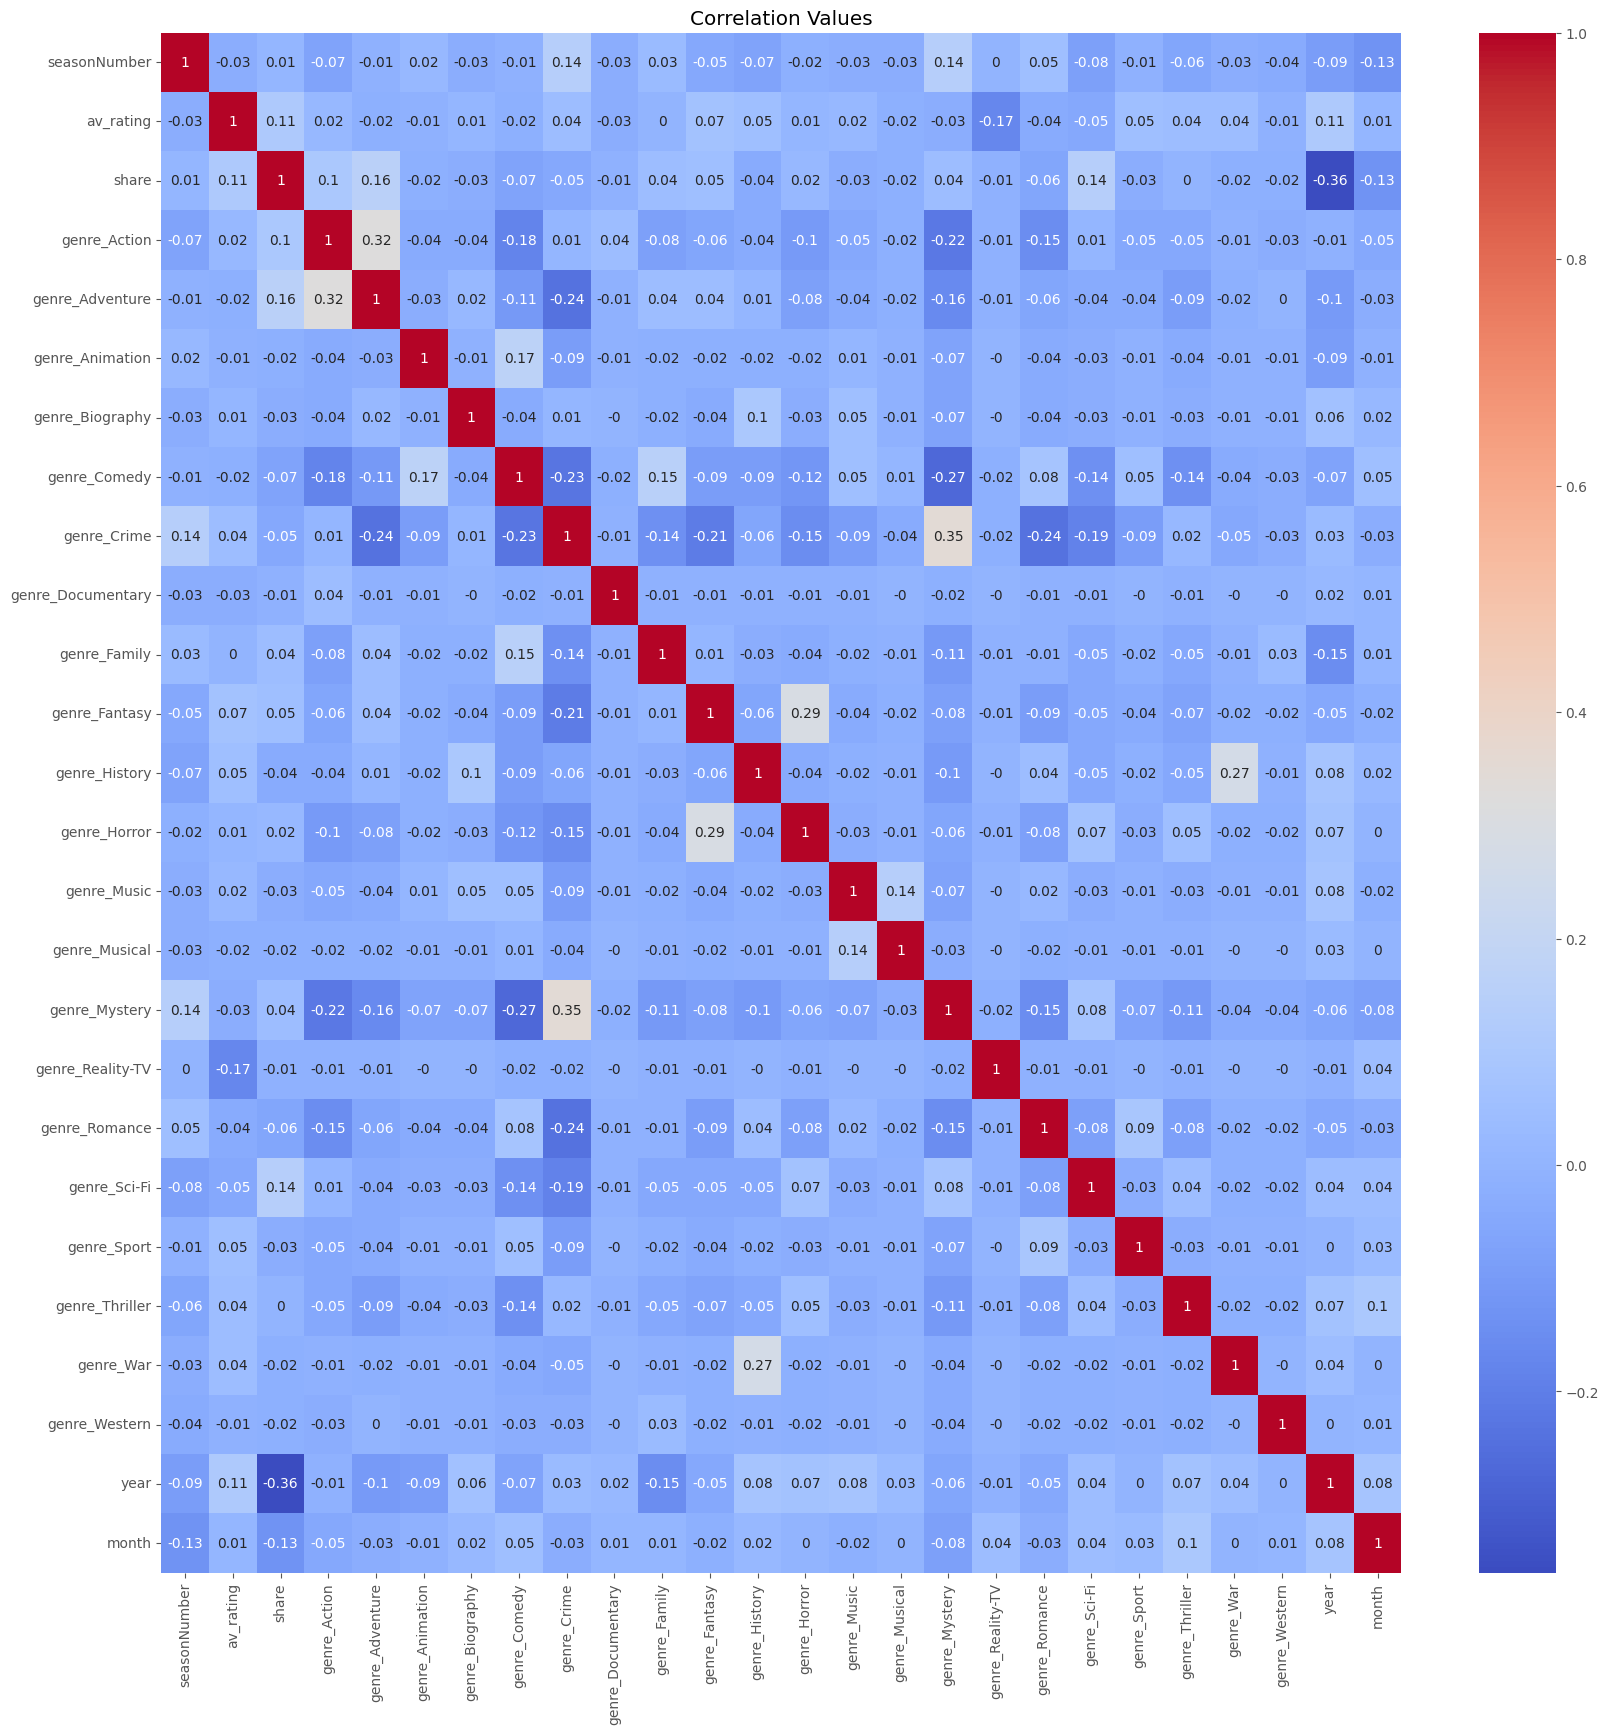

In [66]:
#remove non numeric columns from data
numeric_columns = list(data.columns)
numeric_columns.remove('titleId')
numeric_columns.remove('title')
numeric_columns.remove('date')

scaled_data = data[numeric_columns].copy()

#scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled_data, columns=numeric_columns)

corr_matrix = scaled_data.corr().round(2)

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Values')

In [67]:
#top 10 columns by share

data.sort_values(by='share', ascending=False).head(10)

,titleId,seasonNumber,title,date,av_rating,share,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western,year,month
2061,tt0106179,1,The X-Files,1994-01-04,7.9288,55.65,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1994,1
2121,tt0098936,2,Twin Peaks,1991-01-11,8.4187,55.01,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1991,1
2062,tt0106179,2,The X-Files,1995-01-11,8.1062,49.15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1995,1
2063,tt0106179,3,The X-Files,1996-01-12,8.2933,46.29,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1996,1
1667,tt0106145,1,Star Trek: Deep Space Nine,1993-03-25,7.0936,37.11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1993,3
2065,tt0106179,5,The X-Files,1998-02-04,8.4239,32.43,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1998,2
2120,tt0098936,1,Twin Peaks,1990-04-29,8.7429,29.25,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1990,4
517,tt0092337,1,Dekalog,1990-04-13,8.2218,27.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1990,4
2064,tt0106179,4,The X-Files,1997-01-22,8.2685,24.76,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1997,1
2066,tt0106179,6,The X-Files,1999-02-09,8.4180,19.67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1999,2


In [68]:
#evaluate the share column

data.groupby('year')['share'].sum()

year
1990     99.99
1991     99.99
1992    100.00
1993    100.02
1994     99.98
1995    100.01
1996    100.00
1997    100.00
1998    100.00
1999    100.00
2000    100.01
2001    100.01
2002    100.01
2003     99.99
2004    100.02
2005     99.99
2006     99.96
2007     99.98
2008    100.04
2009     99.96
2010    100.07
2011    100.05
2012    100.03
2013    100.05
2014    100.07
2015    100.08
2016    100.03
2017    100.05
2018    100.05
Name: share, dtype: float64

---
## <font color='red'>Findings and Results</font>

* Show with most season is Law & Order: SVU
* `av_rating` follows a normal distribution with a mean of ~8/10
* The number of released dramas have slowly increased each `year`
* There are few correlations, but fantasy/horror, mystery/crime, and history/war all have slight positive correlations
* `share` column is confirmed to be ONLY of dramas and not all IMDB series
---

---
## <font color='green'>Further In-Depth Data Exploration</font>

* Identify the greatest variance between lowest and highest `av_rating` for seasons within a `title`
* Find top 10 series based on `av_rating` alone
* Total shows of each type per year over time
* Find "Trendsetters" (shows of a genre which sparked an unprecedented number of similar shows in the same genre) for popular genres
* Find some metric of "quality"? aka is there a point where bad shows were mass produced, and can that be shown in a feature
* Use quality metric for per-genre analysis
---

In [69]:
#largest difference between series within an single title

pd.DataFrame(data.groupby('title')['av_rating'].max() - data.groupby('title')['av_rating'].min()).sort_values('av_rating', ascending=False).head()

,av_rating
title,
Third Watch,4.8500
NYPD Blue,3.6153
Are You Afraid of the Dark?,3.4112
Lethal Weapon,2.3756
Law & Order: Special Victims Unit,2.3548


In [70]:
#evaluate Third Watch in detail

data.query('title == "Third Watch"')

,titleId,seasonNumber,title,date,av_rating,share,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western,year,month
2072,tt0197182,1,Third Watch,2000-02-17,4.55,0.09,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,2
2073,tt0197182,6,Third Watch,2005-05-06,9.40,0.02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2005,5


In [71]:
#top 10 shows by rating

top_rated = data.groupby(['title'], as_index=False)['av_rating'].mean().sort_values(by='av_rating', ascending=False).head(10)
top_rated

,title,av_rating
800,Touched by an Angel,9.600000
576,Santa Barbara,9.400000
379,L.A. Law,9.350000
270,Game of Thrones,9.265114
696,The Fugitive Chronicles,9.200000
838,When Calls the Heart,9.157440
146,Code Black,9.120533
508,Person of Interest,9.119000
723,The Leftovers,9.057667
836,Wentworth,9.047980


In [72]:
#graph of all types of shows over years

genres = [col for col in data.columns if 'genre_' in col]

year_grouped = data.groupby('year', as_index=False).sum()
fig = go.Figure()

for genre in genres:
    fig.add_trace(go.Scatter(
        x=year_grouped['year'],
        y=year_grouped[genre],
        connectgaps=True,
        name=genre.replace('genre_', '')
    ))

fig.update_layout(
    title="TV Drama Genres Aired",
    xaxis_title="Year",
    yaxis_title="Total Series"
)

fig.show()

---
## <font color='red'>Findings and Results</font>

* The series "Third Watch" has a >4.8 point rating disparity between seasons 1 and 6
* (**DATA LIMITATION**) Only seasons 1 and 6 of "Third Watch" are present, indicating that this dataset is incomplete
* The most popular 5 genres (most to least popular) as of the most recent year are:
  * Crime - by a large margin
  * Action
  * Mystery
  * Comedy
  * Sci-Fi (Tie with Adventure)
---

---
## <font color=green>Genre Pioneers</font>

* Find genre pioneers: <ins>**shows of a genre which sparked an unprecedented number of similar shows in the same genre**</ins> for the most popular genres

---

In [73]:
#genre specific data for crime

crime_data = data.query('genre_Crime == 1')
crime_data_grouped = data.groupby(['year'], as_index=False)['genre_Crime'].sum()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Crime Series' Share of Total Viewership", "Total Crime Series per Year"))

fig.add_trace(go.Scatter(x=crime_data['date'], y=crime_data['share'], mode='markers', text=crime_data['title']), row=1, col=1)

fig.add_trace(go.Scatter(x=crime_data_grouped['year'], y=crime_data_grouped['genre_Crime'], mode='markers+lines'), row=2, col=1)

fig.update_layout(height=800, showlegend=False)

fig.update_yaxes(title='Share(%)', row=1, col=1)
fig.update_yaxes(title='Count', row=2, col=1)
fig.update_xaxes(title='Date')

In [74]:
#genre specific data for action

action_data = data.query('genre_Action == 1')
action_data_grouped = data.groupby(['year'], as_index=False)['genre_Action'].sum()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Action Series' Share of Total Viewership", "Total Action Series per Year"))

fig.add_trace(go.Scatter(x=action_data['date'], y=action_data['share'], mode='markers', text=action_data['title']), row=1, col=1)

fig.add_trace(go.Scatter(x=action_data_grouped['year'], y=action_data_grouped['genre_Action'], mode='markers+lines'), row=2, col=1)

fig.update_layout(height=800, showlegend=False)

fig.update_yaxes(title='Share(%)', row=1, col=1)
fig.update_yaxes(title='Count', row=2, col=1)
fig.update_xaxes(title='Date')

In [75]:
#genre specific data for mystery

mystery_data = data.query('genre_Mystery == 1')
mystery_data_grouped = data.groupby(['year'], as_index=False)['genre_Mystery'].sum()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Mystery Series' Share of Total Viewership", "Total Mystery Series per Year"))

fig.add_trace(go.Scatter(x=mystery_data['date'], y=mystery_data['share'], mode='markers', text=mystery_data['title']), row=1, col=1)

fig.add_trace(go.Scatter(x=mystery_data_grouped['year'], y=mystery_data_grouped['genre_Mystery'], mode='markers+lines'), row=2, col=1)

fig.update_layout(height=800, showlegend=False)

fig.update_yaxes(title='Share(%)', row=1, col=1)
fig.update_yaxes(title='Count', row=2, col=1)
fig.update_xaxes(title='Date')

---
## <font color='red'>Findings and Results</font>

* Despite the early success of _Twin Peaks_, _The Sopranos_ seems to precede a sharp increase of crime series
* Action is an extremely broad genre, and has many early successful series. However, _Star Trek_ and _Buffy the Vampire Slayer_ are both successful shows which are followed by an influx of new action series
* _The X-Files_ certainly appears to be far and above the most popular mystery show, and many new shows air after its success
* It seems many more dramas air starting in about 2004
---

---
## <font color=green>Genre Quality</font>
* Create a "quality" metric per year. The 25th percentile rating for `av_rating` is 7.73. Create a line plot to show lower quality shows over the years. 
* Apply this quality metric to genres
---

In [76]:
#overall series quality per year

data['quality'] = data['av_rating'] > 7.73
data['quality'] = data['quality'].map({True:1, False:0})

data_quality = data.groupby('year', as_index=False).agg(Sum=pd.NamedAgg(column='quality', aggfunc='sum'), Count=pd.NamedAgg(column='quality', aggfunc='count'))
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_quality['year'], y=data_quality['Sum'] / data_quality['Count'], mode='markers+lines'))

fig.update_layout(showlegend=False, title_text="TV Series Quality (by Rating)")
fig.update_yaxes(title='% Quality')
fig.update_xaxes(title='Date')

In [77]:
#series quality by genre

fig = go.Figure()

genres = ['genre_Crime', 'genre_Action', 'genre_Mystery', 'genre_Comedy', 'genre_Sci-Fi']

for genre in genres:
    data_quality_genre = data.groupby([genre, 'year'], as_index=False).agg(Sum=pd.NamedAgg(column='quality', aggfunc='sum'), Count=pd.NamedAgg(column='quality', aggfunc='count')).sort_values(by='year')
    fig.add_trace(go.Scatter(
        x=data_quality_genre['year'],
        y=data_quality_genre['Sum'] / data_quality_genre['Count'],
        connectgaps=True,
        name=genre.replace('genre_', '')
    ))

fig.update_layout(title_text="Top Genres TV Series Quality (by Rating)")
fig.update_yaxes(title='% Quality')
fig.update_xaxes(title='Year')

---
## <font color='red'>Findings and Results</font>

* Date pre 2000 must be interpreted carefully, as far fewer series aired in this time frame, leading to inflated quality metrics
* Aside from Sci-Fi, the local maximum for multiple series occurs in 2004
* 2005/2007 is an extreme low point for Sci-Fi
* 2004 is significant as this is when the volume of series increases greatly, making this somewhat a "golden period"
---

In [78]:
# EXPORT FINAL CSV

data.to_csv('data_cleaned.csv', index=False)